In [21]:
%pylab inline

import numpy as np
import scipy.linalg as lg

Populating the interactive namespace from numpy and matplotlib


In [112]:
A = [[-0.01, 0], [0.1, -0.3]]
B = [0.5, 0]
C = [0.1, 0.2]
D = [-0.6]

A, B, C, D = map(np.asarray, (A, B, C, D))
I = np.eye(len(A))
B = B[:, None]
C = C[None, :]

tau = 0.1
Ap = (tau**2)*(A**2) + 2*tau*A + I
Bp = ((tau**2)*A + 2*tau*I).dot(B)
E = tau**2 * B

print (tau*A)**2 + 2*tau*A*I + I**2
print (tau*A)**2 + 2*tau*A + I**2
print (tau*A + I)**2

def F1(s):
    return C.dot(lg.inv(s*I - A)).dot(B) + D

def F2(s):
    return C.dot(lg.inv((tau*s + 1)**2*I - Ap)).dot(Bp + E*s) + D

def F3(s):
    M = 2*tau*(s*I - A) + tau**2 * (s**2 * I - A**2)
    return C.dot(lg.inv(M)).dot(Bp + E*s) + D

def F4(s):
    M = ((tau*s + 1)**2*I - Ap).dot(lg.inv(tau**2*A + 2*tau*I + tau**2*s*I))
    return C.dot(lg.inv(M)).dot(B) + D


print F1(1.)
print F2(1.)
print F3(1.)

[[  9.98001000e-01   0.00000000e+00]
 [  1.00000000e-04   9.40900000e-01]]
[[ 0.998001  0.      ]
 [ 0.0201    0.9409  ]]
[[  9.98001000e-01   0.00000000e+00]
 [  1.00000000e-04   9.40900000e-01]]
[[-0.5428789]]
[[-0.54272805]]
[[-0.54272805]]


1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0


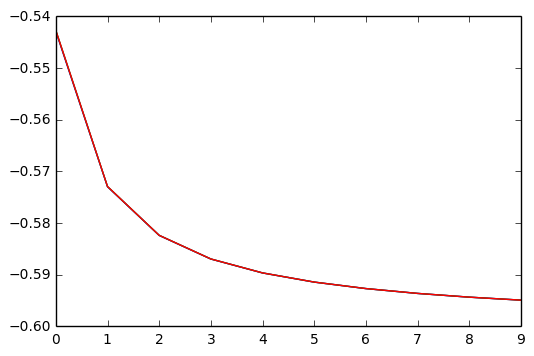

AssertionError: 

In [113]:
s = np.linspace(1, 10, 10)

y1 = []
y2 = []
y3 = []
for si in s:
    print si
    y1.append(F1(si).squeeze())
    y2.append(F2(si).squeeze())
    y3.append(F3(si).squeeze())
    
pylab.figure()
pylab.plot(y1)
pylab.plot(y2)
pylab.plot(y3)
pylab.show()

assert np.allclose(y1, y2)
assert np.allclose(y2, y3)

In [142]:
s = 0
c = np.asarray([tau**2, 2*tau, 1])
k = len(c) - 1

pow = np.linalg.matrix_power

#print sum( c[i] * (s**i * I - A ** i) for i in range(k+1) ).dot(B)

Bj = []
for j in range(k):
    Bj.append( sum( c[i] * pow(A, i-j-1) for i in range(j+1, k+1) ).dot(B) )

print lg.inv(s*I - A).dot(B)
print lg.inv(sum(c[i] * (s**i * I - pow(A, i)) for i in range(k+1))).dot(
    sum(Bj[j] * s**j for j in range(k)))


Mj = []
for j in range(k):
    Mj.append(sum(c[i] * pow(A, i-j-1) for i in range(j+1, k+1)))

print (s*I - A).dot(sum( Mj[j] * s**j for j in range(k)))
print sum(c[i] * (s**i * I - pow(A, i)) for i in range(k+1))

print sum(c[i] * (s**i * I - pow(A, i)) for i in range(k+1))
print sum(c[i] * (s*I - A).dot(sum(pow(A, i-j-1) * s**j for j in range(i))) for i in range(k+1))

i = 2
print c[i] * (s**i * I - pow(A, i))
print c[i] * (s*I - A).dot(sum(pow(A, i-j-1) * s**j for j in range(i)))




[[ 50.        ]
 [ 16.66666667]]
[[ 50.        ]
 [ 16.66666667]]
[[ 0.0019  0.    ]
 [ 0.011  -0.03  ]]
[[ 0.0019  0.    ]
 [ 0.011  -0.03  ]]
[[ 0.0019  0.    ]
 [ 0.011  -0.03  ]]
[[ 0.0019  0.    ]
 [ 0.011  -0.03  ]]
[[-0.0001  0.    ]
 [ 0.031  -0.09  ]]
[[-0.0001  0.    ]
 [ 0.031  -0.09  ]]


In [114]:
print (0.0 * 0.0) ** 0

1.0
